
#Unstructured Data Analytics: Group Assignment 4


#Group Members:
#1.Rithu Anand Krishnan
#2.Manvi Mahajan
#3.Paul Wen (Yilin Wen)
#4.Alex Yu
#5.Judy Chen (Yu-Ting Chen)

**Is a Picture Worth a Thousand Words?**

For this assignment we picked Shein, a popular fast fashion brand. We scrapped around 1500 posts from their instagram account for this task.
https://www.instagram.com/sheinofficial/

Preprocessing the scrapped data to get most useful columns alone and storing it as a csv file.

In [ ]:
#Import statements
import pandas as pd
import nltk
import numpy as np
import sys
import time
import os
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
#Read in data
df = pd.read_csv("Ultimate1500.csv", on_bad_lines='skip')
df

,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,latestComments,dimensionsHeight,dimensionsWidth,displayUrl,images,likesCount,timestamp,childPosts,ownerFullName,ownerUsername,ownerId
0,2982207190607781437,Sidecar,Cli7aOyyt49,Discovered designer talent. Shop new & exclus...,"['SHEINX', 'SHEINXDesigner']",['sheinx__official'],https://www.instagram.com/p/Cli7aOyyt49/,28,Hey there! Thanks for your message! We’re work...,"[{'id': '17981146735749074', 'text': 'Hey ther...",1080,1080,https://scontent-fra5-2.cdninstagram.com/v/t51...,['https://scontent-fra5-2.cdninstagram.com/v/t...,2320,2022-11-29T13:00:22.000Z,"[{'id': '2982207182680447346', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
1,2981482725094011889,Sidecar,ClgWr3tMTPx,Holiday pajamas for everyone on your list.\n\n...,['SHEINholidayseason'],[],https://www.instagram.com/p/ClgWr3tMTPx/,40,Uwu🔥🔥,"[{'id': '17937322499376318', 'text': 'Uwu🔥🔥', ...",1080,1080,https://scontent-fra5-2.cdninstagram.com/v/t51...,['https://scontent-fra5-2.cdninstagram.com/v/t...,6294,2022-11-28T13:00:59.000Z,"[{'id': '2981482719498774159', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
2,2978734179471693448,Sidecar,ClWlvRHuZaI,New season now loading... 🍁⁠\n\nShop Item #: 1...,"[':', 'SHEIN', 'SHEINforAll', 'SHEINstyle', 'f...",[],https://www.instagram.com/p/ClWlvRHuZaI/,126,@xii_i_xciv was @real_lasership supposed to de...,"[{'id': '17966628500047756', 'text': '@xii_i_x...",1350,1080,https://scontent-fra5-2.cdninstagram.com/v/t51...,['https://scontent-fra5-2.cdninstagram.com/v/t...,8422,2022-11-24T18:00:07.000Z,"[{'id': '2978734174052582070', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
3,2982358451259136550,Sidecar,CljdzXQL1om,Wake up like this @taralosito\n\nShop Item #: ...,"[':', 'SHEIN', 'SHEINforAll', 'SHEINstyle', 'f...",['taralosito'],https://www.instagram.com/p/CljdzXQL1om/,20,I don't know of anyone who can inspire people ...,"[{'id': '17956758065230443', 'text': ""I don't ...",1080,1080,https://scontent-fra5-2.cdninstagram.com/v/t51...,['https://scontent-fra5-2.cdninstagram.com/v/t...,3662,2022-11-29T18:00:53.000Z,"[{'id': '2982358446544554134', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
4,2982267514471272217,Sidecar,CljJIDxP08Z,Temps may be dropping but the hems sure aren't...,['SHEINMOD'],[],https://www.instagram.com/p/CljJIDxP08Z/,59,❤️💯,"[{'id': '17944756745425814', 'text': '❤️💯', 'o...",1080,1080,https://scontent-fra5-2.cdninstagram.com/v/t51...,['https://scontent-fra5-2.cdninstagram.com/v/t...,10311,2022-11-29T15:00:13.000Z,"[{'id': '2982267508674703298', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2883750744768365437,Sidecar,CgFJAYKr8N9,Dressed for any occasion 💙✨\n\nShop Item #: 10...,"[':', 'SHEIN', 'SHEINforall', 'SHEINSS22', 'de...",[],https://www.instagram.com/p/CgFJAYKr8N9/,44,wow how cute 😍,"[{'id': '18307701310001897', 'text': 'wow how ...",1350,1080,https://scontent-iad3-1.cdninstagram.com/v/t51...,['https://scontent-iad3-1.cdninstagram.com/v/t...,9652,2022-07-16T16:44:59.000Z,"[{'id': '2883750741932952008', 'type': 'Image'...",SHEIN.COM,sheinofficial,242580313
1178,2883741902370139140,Image,CgFG_tCrmwE,Keep on glowing boo ☀ @reg_gomez\n\nShop Item...,"[':', 'SHEIN', 'SHEINforall', 'SHEINSS22', 'su...",['reg_gomez'],https://www.instagram.com/p/CgFG_tCrmwE/,44,❤️❤️❤️,"[{'id': '17931647804365297', 'text': '❤️❤️❤️',...",1281,1080,https://scontent-iad3-1.cdninstagram.com/v/t51...,[],7662,2022-07-16T16:27:25.000Z,[],SHEIN.COM,sheinofficial,242580313
1179,2883713313557966501,Image,CgFAfror-6l,You are the moment babe ☀ @angelacastellanoss...,"[':', 'Luvlette', 'luvlettepartner', 'Luvlette...","['angelacastellanoss', 'luvletteofficial']",https://www.instagram.com/p/CgFAfror-6l/,50,👏👏👏👏👏,"[{'id': '17971986256637980', 'text': '👏👏👏👏👏', ...",1350,1080,https://scontent-iad3-1.cdninstagram.com/v/t51...,[],11697,2022-07-16T15:30:37.

In [ ]:
updated_df = df[["type","url","displayUrl", "caption", "commentsCount","likesCount"]]
updated_df.dropna(inplace=True)
updated_df.to_csv("updatedassignment4.csv")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Using the image URLs, obtain image labels from Google Vision cloud. Read about Google Vision here: For Google Vision API, look here: https://cloud.google.com/vision/docs/quickstart


In [ ]:
#Install Google Cloud Vision
!pip install google-cloud-vision
!pip install --upgrade google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read in data
posts_df = pd.read_csv('updatedassignment4.csv')

#Filter out videos
mask = (posts_df['type'] == "Image") 
img_posts_df = posts_df[mask].copy()

img_posts_df.head()

,Unnamed: 0,type,url,displayUrl,caption,commentsCount,likesCount
7,7,Image,https://www.instagram.com/p/Cli39u3y_8p/,https://scontent-fra5-2.cdninstagram.com/v/t51...,Matching with my mini-me😘 @normapetris\n\nShop...,62,16817
9,9,Image,https://www.instagram.com/p/Clg5AGNMINL/,https://scontent-fra5-2.cdninstagram.com/v/t51...,It's giving Parisian chic 💗🥖@nermen.kassoum\n\...,47,7846
12,12,Image,https://www.instagram.com/p/ClgPu9-JmDj/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Mini skirt in the Big Apple 🗽 @4deline__\n\nSh...,59,6961
13,13,Image,https://www.instagram.com/p/ClfsiQhDMx4/,https://scontent-frx5-1.cdninstagram.com/v/t51...,"Worth Trying, Worth Buying\n\n🔗:https://shein....",26,2953
14,14,Image,https://www.instagram.com/p/CleUJLaSfVH/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Go big or go monochrome 🤎 @aishamian⁠\n⁠\nShop...,57,11354


In [ ]:
#Credential file
credential_path = "speedy-crawler-369205-ddc68f8b68ed.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

In [ ]:
#Function to get image labels from Google Vision API
#Reference: https://cloud.google.com/vision/docs/labels
def get_labels_url(url):
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    
    try:
        image.source.image_uri = url

        response = client.label_detection(image=image)
        labels = response.label_annotations
    
        #Create an empty label list
        label_list = []
        
        #Iterate through the labels and append it to the label list
        for label in labels:
            label_list.append(label.description)

    #Return Nan for error processing
    except:
        return np.Nan

    return label_list

In [ ]:
#Call function to get image labels
img_posts_df['labels'] = img_posts_df['displayUrl'].apply(get_labels_url)
img_posts_df['labels_str'] = img_posts_df['labels'].apply(lambda x: ' '.join(x))
img_posts_df.to_csv('imgonly.csv')

## Task A 
 
Create a metric for engagement by using a weighted sum of # likes and # comments. 
However, first normalize # likes and # comments such that they both have values between 0 
and 1. You can scale the # likes by dividing by the maximum # likes (for a post) in your data and 
do the same for # comments, so that # likes and comments will be in the range [0,1]. Now 
create an engagement score = .4*# likes (normalized) + .6*# comments (normalized). Define 
High (1) and Low (0) engagement based on whether the engagement score is above or below 
the median value.  

In [ ]:
#Read in data
df = pd.read_csv('imgonly.csv', index_col=0)
df.head()

,Unnamed: 0.1,type,url,displayUrl,caption,commentsCount,likesCount,labels,labels_str
7,7,Image,https://www.instagram.com/p/Cli39u3y_8p/,https://scontent-fra5-2.cdninstagram.com/v/t51...,Matching with my mini-me😘 @normapetris\n\nShop...,62,16817,"['Outerwear', 'Wheel', 'Tartan', 'Car', 'Short...",Outerwear Wheel Tartan Car Shorts Tire Waist T...
9,9,Image,https://www.instagram.com/p/Clg5AGNMINL/,https://scontent-fra5-2.cdninstagram.com/v/t51...,It's giving Parisian chic 💗🥖@nermen.kassoum\n\...,47,7846,"['Outerwear', 'Shoulder', 'Window', 'White', '...",Outerwear Shoulder Window White Leg Neck Texti...
12,12,Image,https://www.instagram.com/p/ClgPu9-JmDj/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Mini skirt in the Big Apple 🗽 @4deline__\n\nSh...,59,6961,"['Building', 'Thigh', 'Sky', 'Metropolis', 'Be...",Building Thigh Sky Metropolis Beauty Human leg...
13,13,Image,https://www.instagram.com/p/ClfsiQhDMx4/,https://scontent-frx5-1.cdninstagram.com/v/t51...,"Worth Trying, Worth Buying\n\n🔗:https://shein....",26,2953,"['Purple', 'Font', 'Pink', 'Violet', 'Magenta'...",Purple Font Pink Violet Magenta Advertising El...
14,14,Image,https://www.instagram.com/p/CleUJLaSfVH/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Go big or go monochrome 🤎 @aishamian⁠\n⁠\nShop...,57,11354,"['Hair', 'Smile', 'Outerwear', 'Hairstyle', 'O...",Hair Smile Outerwear Hairstyle One-piece garme...


In [ ]:
#Normalizing comment count
df.loc[:,('comment_norm')] = df['commentsCount']/max(df['commentsCount']) 

#Normalizing likes count
df.loc[:,('likes_norm')] = df.loc[:,('likesCount')]/max(df['likesCount']) 

df.loc[:,('engage_scores')] = ((0.4* df.loc[:,('likes_norm')]) + (0.6* df.loc[:,('comment_norm')]))

In [ ]:
mid = df['engage_scores'].median()

#Assign 0 or 1 based on median
df['engagement_metr'] = np.where(df['engage_scores'] >= mid, 1, 0)

#Value counts of 1 and 0
df['engagement_metr'].value_counts()

df.head()

,Unnamed: 0.1,type,url,displayUrl,caption,commentsCount,likesCount,labels,labels_str,comment_norm,likes_norm,engage_scores,engagement_metr
7,7,Image,https://www.instagram.com/p/Cli39u3y_8p/,https://scontent-fra5-2.cdninstagram.com/v/t51...,Matching with my mini-me😘 @normapetris\n\nShop...,62,16817,"['Outerwear', 'Wheel', 'Tartan', 'Car', 'Short...",Outerwear Wheel Tartan Car Shorts Tire Waist T...,0.006292,0.038992,0.019372,1
9,9,Image,https://www.instagram.com/p/Clg5AGNMINL/,https://scontent-fra5-2.cdninstagram.com/v/t51...,It's giving Parisian chic 💗🥖@nermen.kassoum\n\...,47,7846,"['Outerwear', 'Shoulder', 'Window', 'White', '...",Outerwear Shoulder Window White Leg Neck Texti...,0.004770,0.018192,0.010139,0
12,12,Image,https://www.instagram.com/p/ClgPu9-JmDj/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Mini skirt in the Big Apple 🗽 @4deline__\n\nSh...,59,6961,"['Building', 'Thigh', 'Sky', 'Metropolis', 'Be...",Building Thigh Sky Metropolis Beauty Human leg...,0.005987,0.016140,0.010048,0
13,13,Image,https://www.instagram.com/p/ClfsiQhDMx4/,https://scontent-frx5-1.cdninstagram.com/v/t51...,"Worth Trying, Worth Buying\n\n🔗:https://shein....",26,2953,"['Purple', 'Font', 'Pink', 'Violet', 'Magenta'...",Purple Font Pink Violet Magenta Advertising El...,0.002639,0.006847,0.004322,0
14,14,Image,https://www.instagram.com/p/CleUJLaSfVH/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Go big or go monochrome 🤎 @aishamian⁠\n⁠\nShop...,57,11354,"['Hair', 'Smile', 'Outerwear', 'Hairstyle', 'O...",Hair Smile Outerwear Hairstyle One-piece garme...,0.005784,0.026326,0.014001,1


## Task B

 Run a logistic regression with Engagement (binary) as the dependent variable, and the 
image labels (text) as independent variables. What is the accuracy (show the confusion matrix)?
What accuracy do you get by using the post caption words as the independent variables instead 
of image labels? Finally, what accuracy do you get by combining the image labels and post 
captions and using them as independent variables? What can you conclude from your analysis?

In [ ]:
df = df.dropna(subset=['labels_str']).copy()
df['labels_str'] = df['labels_str'].apply(lambda x: x.lower())
df = df.reset_index()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy (Image Labels): 0.6341463414634146


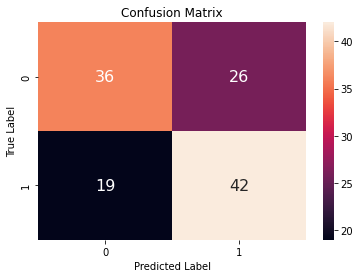

In [ ]:
# Logistic regression with Engagement (binary) as the dependent variable, and the image labels (text) as independent variables. 

Vectorizer = TfidfVectorizer()
Vec_list = Vectorizer.fit_transform(df['labels_str'].tolist())
Vec = Vectorizer.get_feature_names()
Array = pd.DataFrame(Vec_list.toarray())
for i in range(len(Vec)):
    Array = Array.rename(columns={i: Vec[i]}) 
Array['engagement_metr'] = df['engagement_metr']

X_train, X_test, y_train, y_test = train_test_split(Array.iloc[:,:-1], Array['engagement_metr'], test_size=0.20, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train,y_train )

print("Accuracy (Image Labels): " + str(clf.score(X_test, y_test)))

#Plot the confusion matrix
import seaborn as sn
cm=confusion_matrix(y_test, clf.predict(X_test))
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy (Image Labels): 0.6422764227642277


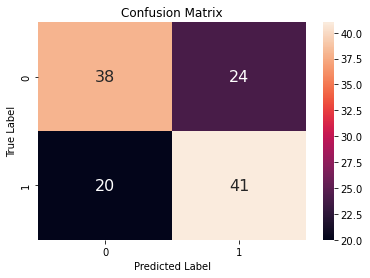

In [ ]:
# Use the post caption words as the independent variables.

Vectorizer = TfidfVectorizer()
Vec_list = Vectorizer.fit_transform(df['caption'].tolist())
Vec = Vectorizer.get_feature_names()
Array = pd.DataFrame(Vec_list.toarray())
for i in range(len(Vec)):
    Array = Array.rename(columns={i: Vec[i]}) 
Array['engagement_2'] = df['engagement_metr']

X_train, X_test, y_train, y_test = train_test_split(Array.iloc[:,:-1], Array['engagement_2'], test_size=0.20, random_state=42)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,y_train )

print("Accuracy (Image Labels): " + str(clf.score(X_test, y_test)))

#Plot the confusion matrix
cm=confusion_matrix(y_test, clf.predict(X_test))
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy (Image Labels): 0.6847290640394089


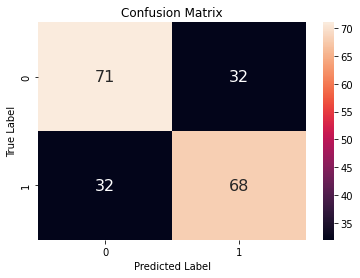

In [ ]:
# Combine the image labels and post captions and use them as independent variables.

df['captions&labels'] = df['caption'] + " " + df['labels_str']
Vectorizer = TfidfVectorizer()
Vec_list = Vectorizer.fit_transform(df['captions&labels'].tolist())
Vec = Vectorizer.get_feature_names()
Array = pd.DataFrame(Vec_list.toarray())
for i in range(len(Vec)):
    Array = Array.rename(columns={i: Vec[i]}) 
Array['engagement_2'] = df['engagement_metr']

X_train, X_test, y_train, y_test = train_test_split(Array.iloc[:,:-1], Array['engagement_2'], test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train,y_train )

print("Accuracy (Image Labels): " + str(clf.score(X_test, y_test)))

#Plot the confusion matrix
cm=confusion_matrix(y_test, clf.predict(X_test))
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Task C

Perform topic modeling (LDA) on the original image_labels. Choose an appropriate number of topics. You may want to start with 4-5 topics, but adjust the number up or down depending on the word distributions you get. Decide on suitable names for each topic.

Now sort the data from high to low number of likes (don’t use the binary column, use the actual number of likes), and consider the highest and the lowest quartiles of likes. What are the main differences in the average topic weights of images across the two quartiles (e.g., greater weight of some topics in the highest versus lowest quartiles)? Show the main results in a table.

In [ ]:
#Read in data
posts_with_labels = pd.read_csv("imgonly.csv")

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
a = posts_with_labels['labels']
import gensim

def process_data (text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

processed = a.map(process_data)
processed[:10]

0    [outerwear, wheel, tartan, shorts, tire, waist...
1    [outerwear, shoulder, window, white, neck, tex...
2    [building, thigh, metropolis, beauty, human, e...
3    [purple, font, pink, violet, magenta, advertis...
4    [hair, smile, outerwear, hairstyle, piece, gar...
5    [footwear, shoe, shoulder, flash, photography,...
6    [white, comfort, textile, wood, rectangle, fon...
7    [clothing, shoe, white, christmas, tree, tarta...
8    [overcoat, neck, coat, fashion, sleeve, waist,...
9    [skin, shoe, hairstyle, shoulder, fashion, fla...
Name: labels, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed)
count = 0
for k, v in dictionary.iteritems():
    count += 1
    if count > 10:
        break

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [ ]:
processed[0]
bow_doc_0 = bow_corpus[0]

for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("eyewear") appears 1 time.
Word 1 ("happy") appears 1 time.
Word 2 ("outerwear") appears 1 time.
Word 3 ("shorts") appears 1 time.
Word 4 ("tartan") appears 1 time.
Word 5 ("thigh") appears 1 time.
Word 6 ("tire") appears 1 time.
Word 7 ("waist") appears 1 time.
Word 8 ("wheel") appears 1 time.


In [ ]:
#Create model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2, random_state=100)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    
topic_1 = 'fashion'
topic_2 = 'photography'
topic_3 = 'human'
topic_4 = 'smile'

Topic: 0 
Words: 0.061*"thigh" + 0.056*"waist" + 0.051*"lingerie" + 0.046*"swimsuit" + 0.038*"flash" + 0.038*"photography" + 0.038*"brassiere" + 0.035*"shoulder" + 0.032*"people" + 0.032*"swimwear"
Topic: 1 
Words: 0.072*"waist" + 0.064*"thigh" + 0.056*"sleeve" + 0.044*"shoulder" + 0.035*"neck" + 0.034*"fashion" + 0.034*"joint" + 0.033*"knee" + 0.027*"design" + 0.027*"trunk"
Topic: 2 
Words: 0.036*"font" + 0.034*"waist" + 0.034*"sleeve" + 0.032*"happy" + 0.030*"design" + 0.030*"thigh" + 0.027*"dress" + 0.023*"fashion" + 0.021*"magenta" + 0.020*"event"
Topic: 3 
Words: 0.047*"waist" + 0.037*"thigh" + 0.035*"vehicle" + 0.035*"human" + 0.033*"dress" + 0.033*"body" + 0.033*"shoulder" + 0.030*"flash" + 0.029*"photography" + 0.028*"automotive"
Topic: 4 
Words: 0.062*"thigh" + 0.053*"waist" + 0.048*"fashion" + 0.046*"sleeve" + 0.032*"shoulder" + 0.027*"eyewear" + 0.027*"neck" + 0.027*"design" + 0.026*"photography" + 0.025*"flash"


In [ ]:
processed[2]

['building',
 'thigh',
 'metropolis',
 'beauty',
 'human',
 'electric',
 'blue',
 'knee',
 'city',
 'event']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5330978631973267	 
Topic: 0.062*"thigh" + 0.053*"waist" + 0.048*"fashion" + 0.046*"sleeve" + 0.032*"shoulder" + 0.027*"eyewear" + 0.027*"neck" + 0.027*"design" + 0.026*"photography" + 0.025*"flash"

Score: 0.4114842414855957	 
Topic: 0.036*"font" + 0.034*"waist" + 0.034*"sleeve" + 0.032*"happy" + 0.030*"design" + 0.030*"thigh" + 0.027*"dress" + 0.023*"fashion" + 0.021*"magenta" + 0.020*"event"

Score: 0.018589284271001816	 
Topic: 0.047*"waist" + 0.037*"thigh" + 0.035*"vehicle" + 0.035*"human" + 0.033*"dress" + 0.033*"body" + 0.033*"shoulder" + 0.030*"flash" + 0.029*"photography" + 0.028*"automotive"

Score: 0.01845213957130909	 
Topic: 0.072*"waist" + 0.064*"thigh" + 0.056*"sleeve" + 0.044*"shoulder" + 0.035*"neck" + 0.034*"fashion" + 0.034*"joint" + 0.033*"knee" + 0.027*"design" + 0.027*"trunk"

Score: 0.018376434221863747	 
Topic: 0.061*"thigh" + 0.056*"waist" + 0.051*"lingerie" + 0.046*"swimsuit" + 0.038*"flash" + 0.038*"photography" + 0.038*"brassiere" + 0.035*"shoulder"

In [ ]:
tab = pd.DataFrame(columns=[topic_1,topic_2,topic_3, topic_4])
i = 0
for bow_corpus_i in bow_corpus:
    for index, score in sorted(lda_model[bow_corpus_i], key=lambda tup: -1*tup[1]):
        if index ==0:
            tab.loc[i, topic_1] = score
        if index ==1:
            tab.loc[i, topic_2] = score
        if index ==2:
            tab.loc[i, topic_3] = score
        if index ==3:
            tab.loc[i, topic_4] = score
    i = i+1
result = pd.concat([posts_with_labels, tab], axis=1)

In [ ]:
result = result.drop(["Unnamed: 0", "Unnamed: 0.1" ], axis = 1)
result.head(5)

,type,url,displayUrl,caption,commentsCount,likesCount,labels,labels_str,fashion,photography,human,smile
0,Image,https://www.instagram.com/p/Cli39u3y_8p/,https://scontent-fra5-2.cdninstagram.com/v/t51...,Matching with my mini-me😘 @normapetris\n\nShop...,62,16817,"['Outerwear', 'Wheel', 'Tartan', 'Car', 'Short...",Outerwear Wheel Tartan Car Shorts Tire Waist T...,0.020427,0.020565,0.020751,0.527095
1,Image,https://www.instagram.com/p/Clg5AGNMINL/,https://scontent-fra5-2.cdninstagram.com/v/t51...,It's giving Parisian chic 💗🥖@nermen.kassoum\n\...,47,7846,"['Outerwear', 'Shoulder', 'Window', 'White', '...",Outerwear Shoulder Window White Leg Neck Texti...,0.020343,0.020698,0.020316,0.020268
2,Image,https://www.instagram.com/p/ClgPu9-JmDj/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Mini skirt in the Big Apple 🗽 @4deline__\n\nSh...,59,6961,"['Building', 'Thigh', 'Sky', 'Metropolis', 'Be...",Building Thigh Sky Metropolis Beauty Human leg...,0.018376,0.018452,0.411399,0.01859
3,Image,https://www.instagram.com/p/ClfsiQhDMx4/,https://scontent-frx5-1.cdninstagram.com/v/t51...,"Worth Trying, Worth Buying\n\n🔗:https://shein....",26,2953,"['Purple', 'Font', 'Pink', 'Violet', 'Magenta'...",Purple Font Pink Violet Magenta Advertising El...,0.016743,0.016733,0.932853,0.016823
4,Image,https://www.instagram.com/p/CleUJLaSfVH/,https://scontent-frx5-1.cdninstagram.com/v/t51...,Go big or go monochrome 🤎 @aishamian⁠\n⁠\nShop...,57,11354,"['Hair', 'Smile', 'Outerwear', 'Hairstyle', 'O...",Hair Smile Outerwear Hairstyle One-piece garme...,0.925266,0.018732,0.018572,0.018633


In [ ]:
#Sort by likes
result_sorted = result.sort_values(by=['likesCount'], ascending=False)

In [ ]:
result_sorted.head(5)

,type,url,displayUrl,caption,commentsCount,likesCount,labels,labels_str,fashion,photography,human,smile
70,Image,https://www.instagram.com/p/CkdkTqgL2mE/,https://scontent-fra5-2.cdninstagram.com/v/t51...,bestie duties!!🤣📸 @nicolekhalil @itslydboss @s...,9854,431291,"['Hairstyle', 'Shoulder', 'Leg', 'Dress', 'Whe...",Hairstyle Shoulder Leg Dress Wheel Flash photo...,0.020518,0.020532,0.020207,0.918171
25,Image,https://www.instagram.com/p/ClQ9QRlMsiR/,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Rest days are important🤣 @sarcasm_only⁠\n⁠\n#S...,938,166675,"['Joint', 'Outerwear', 'Arm', 'Photograph', 'B...",Joint Outerwear Arm Photograph Black Neck Slee...,0.020324,0.020531,0.020228,0.020224
78,Image,https://www.instagram.com/p/CkY2IpoubD_/,https://instagram.fcok13-1.fna.fbcdn.net/v/t51...,When u finally get your good side😂\n\n#SHEINin...,327,118776,"['Cat', 'Felidae', 'Wood', 'Carnivore', 'Floor...",Cat Felidae Wood Carnivore Flooring Floor Grey...,0.736502,0.016123,0.216278,0.015431
99,Image,https://www.instagram.com/p/CkDw7GUPJNr/,https://instagram.fsde2-1.fna.fbcdn.net/v/t51....,"Pick a vibe 1,2 or 3?\n\nShop Item #:11492074 ...",2065,90795,"['Outerwear', 'Shoe', 'Product', 'Sleeve', 'Sp...",Outerwear Shoe Product Sleeve Sportswear Font ...,0.016807,0.017193,0.931842,0.01709
538,Image,https://www.instagram.com/p/CgzhLjRuEIv/,https://instagram.fhan14-1.fna.fbcdn.net/v/t51...,🌿♥️ Summer Vibes ♥️🌿 @natalialozanofr⁠\n⁠\nSho...,613,86478,"['Lingerie top', 'Brassiere', 'Sky', 'Waist', ...",Lingerie top Brassiere Sky Waist Thigh Underga...,0.80785,0.136876,0.018309,0.018336


In [ ]:
q = result_sorted.quantile([0.00, 0.25, 0.50, 0.75, 1.00])
df = result_sorted
col = 'likesCount'

quart1 = df[((df[col]>=q[col][0.00]) & (df[col]<q[col][0.25]))]
quart4 = df[((df[col]>=q[col][0.75]) & (df[col]<=q[col][1.00]))]

result = pd.concat([quart1,quart4])

result.head(5)

,type,url,displayUrl,caption,commentsCount,likesCount,labels,labels_str,fashion,photography,human,smile
247,Image,https://www.instagram.com/p/Ci1Hl8PJMUP/,https://instagram.fixc2-2.fna.fbcdn.net/v/t51....,Pretty in Pink! 💗👇 @itssissysheridan\n\nShop I...,78,6336,"['Joint', 'Hairstyle', 'Plant', 'Fashion', 'Ne...",Joint Hairstyle Plant Fashion Neck Human body ...,0.015864,0.01579,0.015576,0.026672
430,Image,https://www.instagram.com/p/ChXuf7ttY_Z/,https://instagram.fewr1-6.fna.fbcdn.net/v/t51....,"Sparkle too hard ? ✨ JK, we know that's imposs...",18,6332,"['Fashion', 'Pink', 'Dress', 'Flash photograph...",Fashion Pink Dress Flash photography Interior ...,0.01851,0.018597,0.414532,0.018644
164,Image,https://www.instagram.com/p/CjXquQfMqV2/,https://instagram.fkgf2-1.fna.fbcdn.net/v/t51....,Layer like a player 🙌\n\nShop Item #: 11156861...,28,6320,[],NaN,0.2,0.2,0.2,0.2
343,Image,https://www.instagram.com/p/CiC2y4OsBAQ/,https://scontent-sea1-1.cdninstagram.com/v/t51...,Loving this look 💯 @elisha.mua⁠\n⁠\nShop Item...,21,6308,"['Joint', 'Shoulder', 'Neck', 'Waist', 'Sleeve...",Joint Shoulder Neck Waist Sleeve Gesture Thigh...,0.018469,0.925855,0.018349,0.018617
300,Image,https://www.instagram.com/p/CicsdvzuQej/,https://instagram.fsgn2-6.fna.fbcdn.net/v/t51....,#OOTD inspiration 😍 @eucarolsoaress⁠\n⁠\nShop...,23,6303,"['Joint', 'Lip', 'Hairstyle', 'Eyebrow', 'Shou...",Joint Lip Hairstyle Eyebrow Shoulder Shorts Bl...,0.022656,0.023083,0.022551,0.022742


In [ ]:
lower_quart_avg = quart1.mean()
upper_quart_avg = quart4.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
lower_quart = lower_quart_avg.drop(["commentsCount", "likesCount"]);
lower_quart

fashion        0.189934
photography    0.177495
human          0.272256
smile          0.149043
dtype: float64

In [ ]:
upper_quart = upper_quart_avg.drop(["commentsCount", "likesCount"]);
upper_quart

fashion        0.443155
photography    0.150227
human          0.102356
smile          0.147514
dtype: float64

In [ ]:
quartile_topics = pd.concat([upper_quart,lower_quart],axis=1)
quartile_topics.columns = ['Top Quartile','Bottom Quartile']
quartile_topics

,Top Quartile,Bottom Quartile
fashion,0.443155,0.189934
photography,0.150227,0.177495
human,0.102356,0.272256
smile,0.147514,0.149043


## Task D. 
What advice would you give Shein if it wants to increase engagement on 
its Instagram page based on your findings in Tasks B and C?   

Based on our analysis of Shein's Instagram feed, here's what we found. 

Findings from Task B:

The highest accuracy was between image labels with captions and engagement score with 0.6847. This goes to show that combining both the image labels and captions play a huge role in engagement by users. The accuracy of captions and image labels individually was less than image labels and captions so Shein should focus equally on choosing a correct image along with an innovative caption because this has higher prediction power of engagement score. 

Findings from Task C:

In our LDA analysis, we picked four topics; 'Fashion', 'Human', 'Photography', and 'Smile'. Topics like 'thigh', 'waist', 'lingerie', and 'swimsuit' seemed to appear quite often too. But we decided not to consider these because Shein is not primarily a loungewear or bath suit company. Their collection ranges from accessories to all types of clothing.   
We believe that Shein should focus on their Fashion centered posts to increase their social media engagement on the platform. This is obvious given that Shein is a fashion brand but we want to dig into specific elements of fashion that they should focus on. As we can see, the quality of image matters a lot. We make this analysis based on the top quartile score of Photography being the second highest value. The surprise element is Smile and everybody loves a good smile. We advise that Shein photographs their models in a way that best showcases their precious smile as this is the most engaging topic.